# `2.3 a) Trees`

1. (SMOTE) 'Synthetic Minority Over-sampling Technique' class balancing 
1. Modeling
    - a) Decision Tree 
    - b) Random Forest
    - c) (XGBoost) Extreme Gradient Boosting 

## 2.3.0 Libraries and constants

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2.3.1 Class balancing with SMOTE
from imblearn.over_sampling import SMOTE

# 2.3.2 Modeling
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from sklearn.tree     import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost          import XGBClassifier

In [2]:
# Constants
TARGET_COLUMN = 'T1 - Is good credit'
RANDOM_STATE = 42

In [3]:
## Processed 10% Data
TRAIN_PROCESSED_10_PATH  = 'data/processed-data/2-fayaad-2-train_10_processed.csv'
TEST_PROCESSED_10_PATH   = 'data/processed-data/2-fayaad-2-test_10_processed.csv'

PROCESSED_TRAIN_10_DF = pd.read_csv(TRAIN_PROCESSED_10_PATH)
PROCESSED_TEST_10_DF  = pd.read_csv(TEST_PROCESSED_10_PATH)

Y_TRAIN_10, X_TRAIN_10 = PROCESSED_TRAIN_10_DF[TARGET_COLUMN], PROCESSED_TRAIN_10_DF.drop(columns=[TARGET_COLUMN])
Y_TEST_10,  X_TEST_10  = PROCESSED_TEST_10_DF[TARGET_COLUMN],  PROCESSED_TEST_10_DF.drop(columns=[TARGET_COLUMN])

In [4]:
## Processed 30% Data
TRAIN_PROCESSED_30_PATH  = 'data/processed-data/2-fayaad-2-train_30_processed.csv'
TEST_PROCESSED_30_PATH   = 'data/processed-data/2-fayaad-2-test_30_processed.csv'

PROCESSED_TRAIN_30_DF = pd.read_csv(TRAIN_PROCESSED_30_PATH)
PROCESSED_TEST_30_DF  = pd.read_csv(TEST_PROCESSED_30_PATH)

Y_TRAIN_30, X_TRAIN_30 = PROCESSED_TRAIN_30_DF[TARGET_COLUMN], PROCESSED_TRAIN_30_DF.drop(columns=[TARGET_COLUMN])
Y_TEST_30,  X_TEST_30  = PROCESSED_TEST_30_DF[TARGET_COLUMN],  PROCESSED_TEST_30_DF.drop(columns=[TARGET_COLUMN])

In [5]:
## Raw 30% Data
TRAIN_RAW_30_PATH  = 'data/processed-data/2-fayaad-2-train_30_raw.csv'
TEST_RAW_30_PATH   = 'data/processed-data/2-fayaad-2-test_30_raw.csv'

RAW_TRAIN_30_DF = pd.read_csv(TRAIN_RAW_30_PATH)
RAW_TEST_30_DF  = pd.read_csv(TEST_RAW_30_PATH)

Y_TRAIN_RAW_30, X_TRAIN_RAW_30 = RAW_TRAIN_30_DF[TARGET_COLUMN], RAW_TRAIN_30_DF.drop(columns=[TARGET_COLUMN])
Y_TEST_RAW_30,  X_TEST_RAW_30  = RAW_TEST_30_DF[TARGET_COLUMN],  RAW_TEST_30_DF.drop(columns=[TARGET_COLUMN])

## 2.3.1 Class balancing

In [7]:
# Instantiate SMOTE
smoter = SMOTE(random_state = RANDOM_STATE)

In [8]:
## SMOTE 10% Data
X_TRAIN_10_RESAMPLED, Y_TRAIN_10_RESAMPLED = smoter.fit_resample(X_TRAIN_10, Y_TRAIN_10)

In [9]:
## SMOTE 30% Data
X_TRAIN_30_RESAMPLED, Y_TRAIN_30_RESAMPLED = smoter.fit_resample(X_TRAIN_30, Y_TRAIN_30)

In [10]:
## SMOTE Raw 30% Data
X_TRAIN_RAW_30_RESAMPLED, Y_TRAIN_RAW_30_RESAMPLED = smoter.fit_resample(X_TRAIN_RAW_30, Y_TRAIN_RAW_30)

## 2.3.2 Modeling

![Confusion matrix and metrics](https://www.researchgate.net/publication/367393140/figure/fig4/AS:11431281414573567@1746013536337/Confusion-matrix-Precision-Recall-Accuracy-and-F1-score.tif)

In [11]:
def fit_predict_metrics(model, is_using_smote: bool, X_train, X_test, y_train, y_test):
    
    print(
        f"""\n--- {model.__class__.__name__} Results ---
        SMOTE applied: {is_using_smote}""")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')

In [12]:
# Instantiate models (DT, RF, XGB)
decision_tree       = DecisionTreeClassifier(random_state=RANDOM_STATE)
random_forest_model = RandomForestClassifier(random_state=RANDOM_STATE)
xgb_model           = XGBClassifier         (random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss')

### a) Decision Tree


--- DecisionTreeClassifier Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

           0       0.47      0.57      0.52        30
           1       0.80      0.73      0.76        70

    accuracy                           0.68       100
   macro avg       0.63      0.65      0.64       100
weighted avg       0.70      0.68      0.69       100


--- DecisionTreeClassifier Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

           0       0.53      0.57      0.55        30
           1       0.81      0.79      0.80        70

    accuracy                           0.72       100
   macro avg       0.67      0.68      0.67       100
weighted avg       0.73      0.72      0.72       100



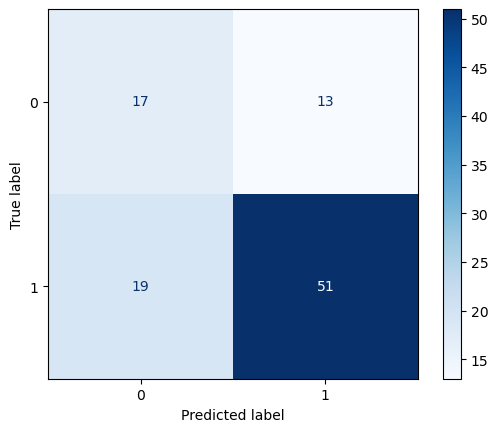

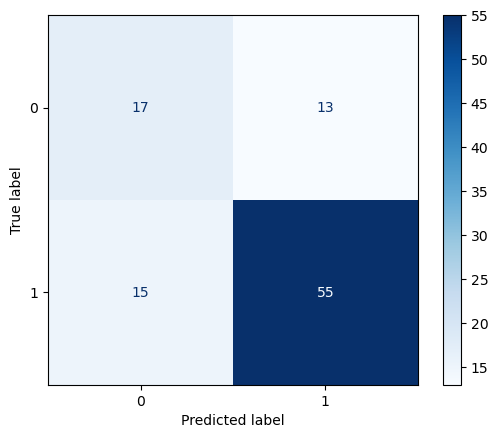

In [13]:
# DT 10% Data
fit_predict_metrics(decision_tree,  is_using_smote=True,  X_train=X_TRAIN_10_RESAMPLED, y_train=Y_TRAIN_10_RESAMPLED, X_test=X_TEST_10, y_test=Y_TEST_10)
fit_predict_metrics(decision_tree,  is_using_smote=False, X_train=X_TRAIN_10,           y_train=Y_TRAIN_10,           X_test=X_TEST_10, y_test=Y_TEST_10)


--- DecisionTreeClassifier Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

           0       0.37      0.42      0.39        90
           1       0.74      0.69      0.71       210

    accuracy                           0.61       300
   macro avg       0.55      0.56      0.55       300
weighted avg       0.63      0.61      0.62       300


--- DecisionTreeClassifier Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

           0       0.46      0.50      0.48        90
           1       0.78      0.75      0.77       210

    accuracy                           0.68       300
   macro avg       0.62      0.63      0.62       300
weighted avg       0.68      0.68      0.68       300



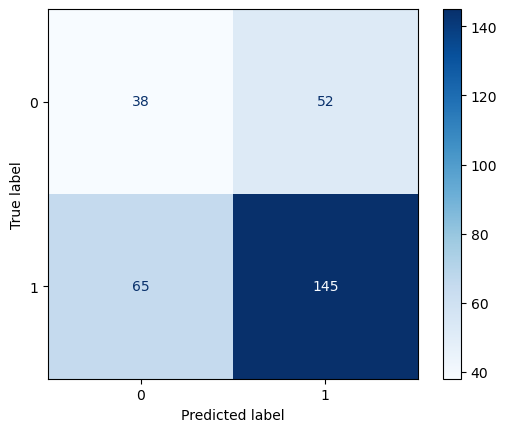

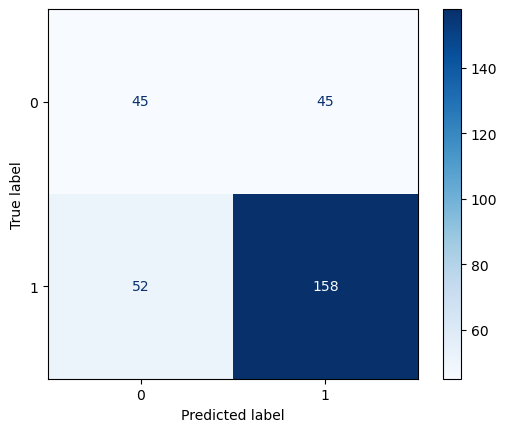

In [14]:
# DT 30% Data
fit_predict_metrics(decision_tree,  is_using_smote=True,  X_train=X_TRAIN_30_RESAMPLED, y_train=Y_TRAIN_30_RESAMPLED, X_test=X_TEST_30, y_test=Y_TEST_30)
fit_predict_metrics(decision_tree,  is_using_smote=False, X_train=X_TRAIN_30,           y_train=Y_TRAIN_30,           X_test=X_TEST_30, y_test=Y_TEST_30)


--- DecisionTreeClassifier Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

       False       0.52      0.52      0.52        90
        True       0.79      0.79      0.79       210

    accuracy                           0.71       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.71      0.71      0.71       300


--- DecisionTreeClassifier Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

       False       0.39      0.33      0.36        90
        True       0.73      0.78      0.76       210

    accuracy                           0.65       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.63      0.65      0.64       300



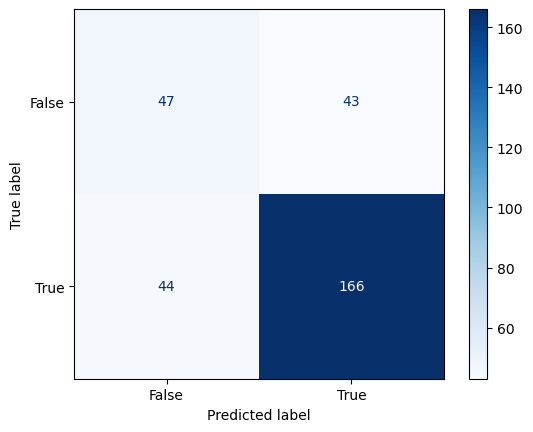

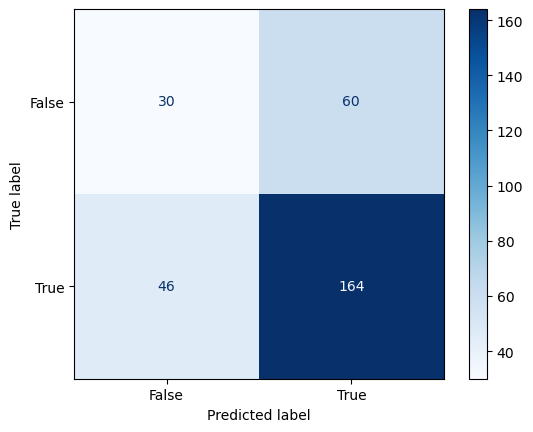

In [15]:
# DT Raw 30% Data
fit_predict_metrics(decision_tree,  is_using_smote=True,  X_train=X_TRAIN_RAW_30_RESAMPLED, y_train=Y_TRAIN_RAW_30_RESAMPLED, X_test=X_TEST_RAW_30, y_test=Y_TEST_RAW_30)
fit_predict_metrics(decision_tree,  is_using_smote=False, X_train=X_TRAIN_RAW_30,           y_train=Y_TRAIN_RAW_30,           X_test=X_TEST_RAW_30, y_test=Y_TEST_RAW_30)

### b) Random Forest


--- RandomForestClassifier Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        30
           1       0.81      0.83      0.82        70

    accuracy                           0.74       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.74      0.74      0.74       100


--- RandomForestClassifier Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

           0       0.56      0.33      0.42        30
           1       0.76      0.89      0.82        70

    accuracy                           0.72       100
   macro avg       0.66      0.61      0.62       100
weighted avg       0.70      0.72      0.70       100



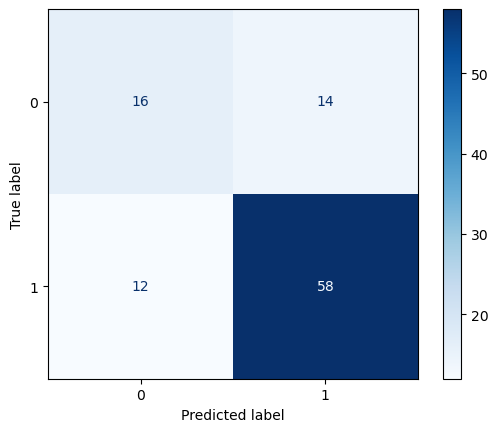

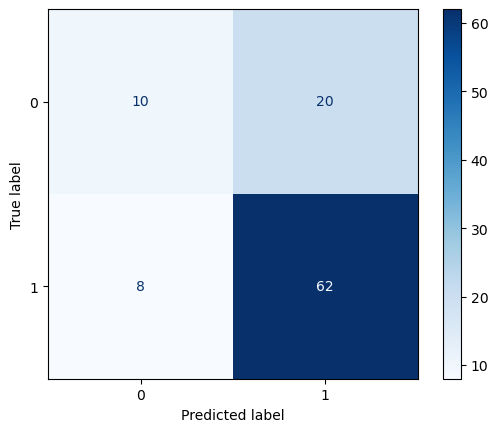

In [16]:
# RF 10% Data
fit_predict_metrics(random_forest_model,  is_using_smote=True,  X_train=X_TRAIN_10_RESAMPLED, y_train=Y_TRAIN_10_RESAMPLED, X_test=X_TEST_10, y_test=Y_TEST_10)
fit_predict_metrics(random_forest_model,  is_using_smote=False, X_train=X_TRAIN_10,           y_train=Y_TRAIN_10,           X_test=X_TEST_10, y_test=Y_TEST_10)


--- RandomForestClassifier Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

           0       0.48      0.36      0.41        90
           1       0.75      0.84      0.79       210

    accuracy                           0.69       300
   macro avg       0.62      0.60      0.60       300
weighted avg       0.67      0.69      0.68       300


--- RandomForestClassifier Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

           0       0.51      0.31      0.39        90
           1       0.75      0.87      0.80       210

    accuracy                           0.70       300
   macro avg       0.63      0.59      0.60       300
weighted avg       0.68      0.70      0.68       300



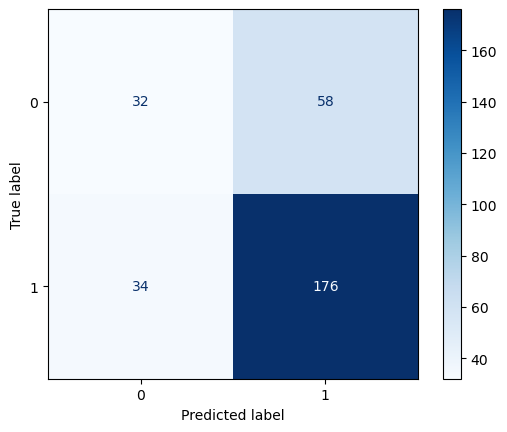

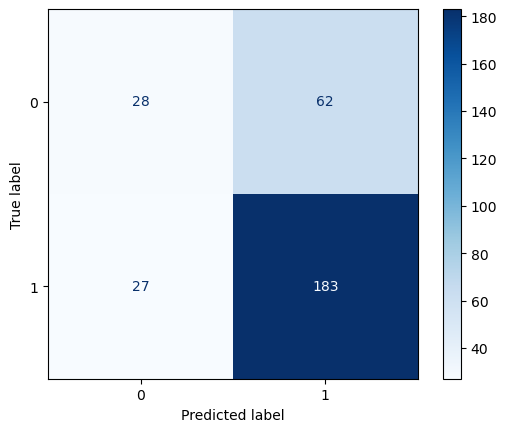

In [17]:
# RF 30% Data
fit_predict_metrics(random_forest_model,  is_using_smote=True,  X_train=X_TRAIN_30_RESAMPLED, y_train=Y_TRAIN_30_RESAMPLED, X_test=X_TEST_30, y_test=Y_TEST_30)
fit_predict_metrics(random_forest_model,  is_using_smote=False, X_train=X_TRAIN_30,           y_train=Y_TRAIN_30,           X_test=X_TEST_30, y_test=Y_TEST_30)


--- RandomForestClassifier Results ---
        SMOTE applied: True
              precision    recall  f1-score   support

       False       0.61      0.47      0.53        90
        True       0.79      0.87      0.83       210

    accuracy                           0.75       300
   macro avg       0.70      0.67      0.68       300
weighted avg       0.74      0.75      0.74       300


--- RandomForestClassifier Results ---
        SMOTE applied: False
              precision    recall  f1-score   support

       False       0.61      0.37      0.46        90
        True       0.77      0.90      0.83       210

    accuracy                           0.74       300
   macro avg       0.69      0.63      0.64       300
weighted avg       0.72      0.74      0.72       300



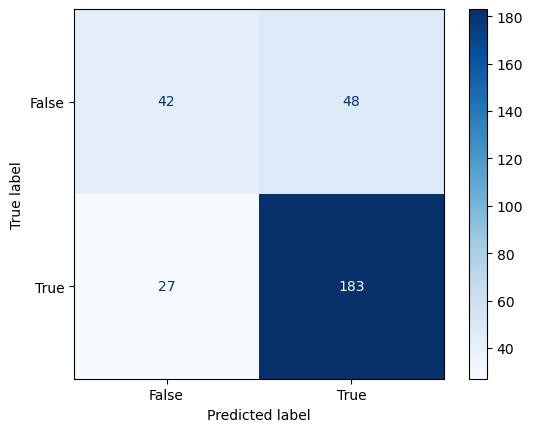

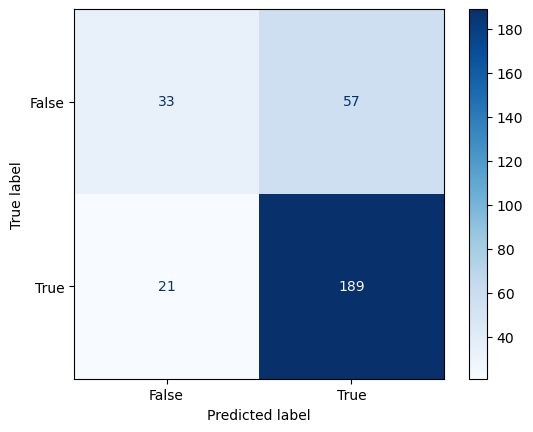

In [18]:
# RF Raw 30% Data
fit_predict_metrics(random_forest_model,  is_using_smote=True,  X_train=X_TRAIN_RAW_30_RESAMPLED, y_train=Y_TRAIN_RAW_30_RESAMPLED, X_test=X_TEST_RAW_30, y_test=Y_TEST_RAW_30)
fit_predict_metrics(random_forest_model,  is_using_smote=False, X_train=X_TRAIN_RAW_30,           y_train=Y_TRAIN_RAW_30,           X_test=X_TEST_RAW_30, y_test=Y_TEST_RAW_30)

### c) (XGBoost) Extreme Gradient Boosting


--- XGBClassifier Results ---
        SMOTE applied: True


/opt/homebrew/Caskroom/miniconda/base/envs/gcd/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:47:34] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.44      0.40      0.42        30
           1       0.75      0.79      0.77        70

    accuracy                           0.67       100
   macro avg       0.60      0.59      0.60       100
weighted avg       0.66      0.67      0.66       100


--- XGBClassifier Results ---
        SMOTE applied: False


/opt/homebrew/Caskroom/miniconda/base/envs/gcd/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:47:35] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.58      0.50      0.54        30
           1       0.80      0.84      0.82        70

    accuracy                           0.74       100
   macro avg       0.69      0.67      0.68       100
weighted avg       0.73      0.74      0.73       100



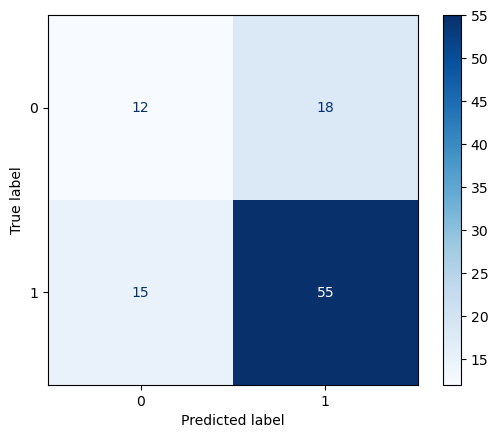

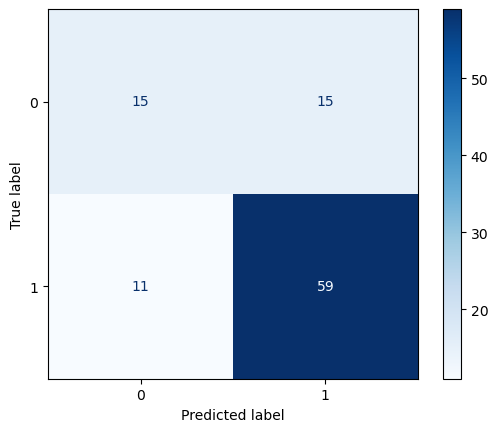

In [19]:
# XBG 10% Data
fit_predict_metrics(xgb_model, is_using_smote=True,  X_train=X_TRAIN_10_RESAMPLED, y_train=Y_TRAIN_10_RESAMPLED, X_test=X_TEST_10, y_test=Y_TEST_10)
fit_predict_metrics(xgb_model, is_using_smote=False, X_train=X_TRAIN_10,           y_train=Y_TRAIN_10,           X_test=X_TEST_10, y_test=Y_TEST_10)


--- XGBClassifier Results ---
        SMOTE applied: True


/opt/homebrew/Caskroom/miniconda/base/envs/gcd/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:47:35] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.50      0.43      0.46        90
           1       0.77      0.81      0.79       210

    accuracy                           0.70       300
   macro avg       0.64      0.62      0.63       300
weighted avg       0.69      0.70      0.69       300


--- XGBClassifier Results ---
        SMOTE applied: False


/opt/homebrew/Caskroom/miniconda/base/envs/gcd/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:47:35] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.46      0.40      0.43        90
           1       0.76      0.80      0.78       210

    accuracy                           0.68       300
   macro avg       0.61      0.60      0.60       300
weighted avg       0.67      0.68      0.67       300



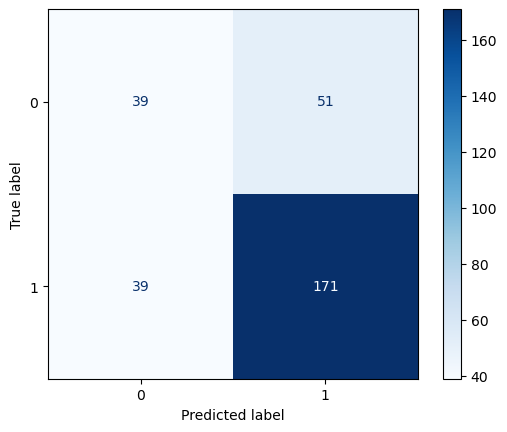

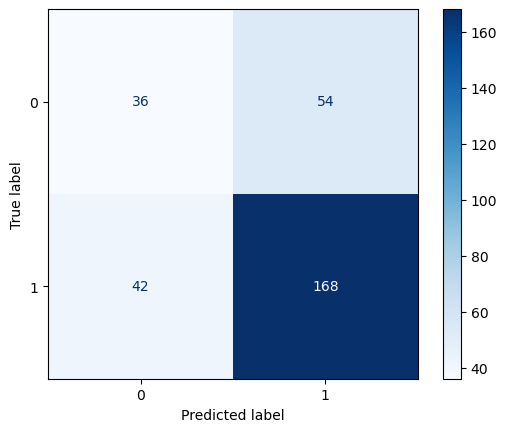

In [20]:
# XGB 30% Data
fit_predict_metrics(xgb_model, is_using_smote=True,  X_train=X_TRAIN_30_RESAMPLED, y_train=Y_TRAIN_30_RESAMPLED, X_test=X_TEST_30, y_test=Y_TEST_30)
fit_predict_metrics(xgb_model, is_using_smote=False, X_train=X_TRAIN_30,           y_train=Y_TRAIN_30,           X_test=X_TEST_30, y_test=Y_TEST_30)


--- XGBClassifier Results ---
        SMOTE applied: True


/opt/homebrew/Caskroom/miniconda/base/envs/gcd/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:47:35] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

       False       0.55      0.40      0.46        90
        True       0.77      0.86      0.81       210

    accuracy                           0.72       300
   macro avg       0.66      0.63      0.64       300
weighted avg       0.70      0.72      0.71       300


--- XGBClassifier Results ---
        SMOTE applied: False


/opt/homebrew/Caskroom/miniconda/base/envs/gcd/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:47:36] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

       False       0.51      0.40      0.45        90
        True       0.76      0.83      0.80       210

    accuracy                           0.70       300
   macro avg       0.64      0.62      0.62       300
weighted avg       0.69      0.70      0.69       300



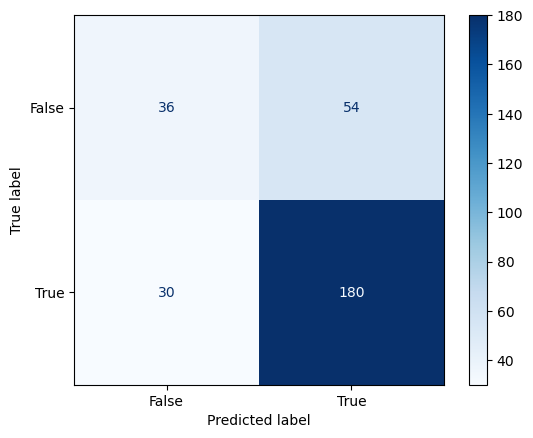

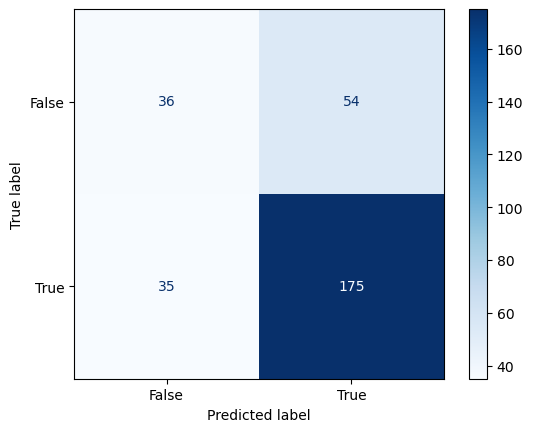

In [21]:
# XGB Raw 30% Data
fit_predict_metrics(xgb_model, is_using_smote=True,  X_train=X_TRAIN_RAW_30_RESAMPLED, y_train=Y_TRAIN_RAW_30_RESAMPLED, X_test=X_TEST_RAW_30, y_test=Y_TEST_RAW_30)
fit_predict_metrics(xgb_model, is_using_smote=False, X_train=X_TRAIN_RAW_30,           y_train=Y_TRAIN_RAW_30,           X_test=X_TEST_RAW_30, y_test=Y_TEST_RAW_30)

# END